# Problema 2

In [ ]:
#Paquetes a usar en el problema 2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## a) Gray_flip()

In [ ]:
def gray_flip(tau, N):

    tau = list(tau)

    k = tau[0]

    if k > N:
        return None, None

    tau[k-1] = tau[k]
    tau[k] = k + 1

    if k != 1:
        tau[0] = 1

    return tau, k

Para testear si funciona para un $N$ pequeño tenemos que crear un array $\tau = [\tau_0, ....., \tau_N]$ e ir almacenando las configuraciones que se generan

In [ ]:
N=4 #N = 2 X 2
S = [-1]* N
print(f'1: {S}') #primer valor
tau_in = np.arange(1, N + 2)
for i in range(1, 2**N):
    tau_in, k = gray_flip(tau_in, N)
    S[k-1] *= -1
    print(f'{i+1}: {S}')

1: [-1, -1, -1, -1]
2: [1, -1, -1, -1]
3: [1, 1, -1, -1]
4: [-1, 1, -1, -1]
5: [-1, 1, 1, -1]
6: [1, 1, 1, -1]
7: [1, -1, 1, -1]
8: [-1, -1, 1, -1]
9: [-1, -1, 1, 1]
10: [1, -1, 1, 1]
11: [1, 1, 1, 1]
12: [-1, 1, 1, 1]
13: [-1, 1, -1, 1]
14: [1, 1, -1, 1]
15: [1, -1, -1, 1]
16: [-1, -1, -1, 1]


Se evidencia que se replica la tabla. Para complementar con el algoritmo de *enumerate_ising* utilizamos la formulacón previa pero la modificamos de forma que podamos tener la densidad de estados. Algo importante es cómo definir las condiciones periódicas para lo cual se utilizó chatgpt el cual sugiere que para mayor eficiencia del programa estás sean definidas como un diccionario.

## Lattice de 2x2

In [ ]:
L = 2
N = L*L
#Diccionario para condiciones de borde con red de LxL
vecinos = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,(i // L) * L + (i - 1) % L, (i - L) % N) for i in range(N)}
S = [-1] * N
E = -2 * N
D_estados = []
tau = np.arange(1, N + 2)
for i in range(1, 2 ** N):
    tau, k = gray_flip(tau, N)
    h=0
    for j in vecinos[k - 1]:
      h += S[j]
    E += 2 * h * S[k - 1]
    if E >= 0:
      D_estados.append(E)
    contador = Counter(D_estados)
    S[k - 1] *= -1
print(f'Densidad de cada valor de energía: {contador}')

Densidad de cada valor de energía: Counter({0: 12, 8: 2})


## Lattice de 4x4

In [ ]:
L =4
N = L*L
#Diccionario para condiciones de borde con red de LxL
vecinos = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,(i // L) * L + (i - 1) % L, (i - L) % N) for i in range(N)}
S = [-1] * N
E = -2 * N
D_estados = []
tau = np.arange(1, N + 2)
for i in range(1, 2 ** N):
    tau, k = gray_flip(tau, N)
    h=0
    for j in vecinos[k - 1]:
      h += S[j]
    E += 2 * h * S[k - 1]
    if E >= 0:
      D_estados.append(E)
    contador = Counter(D_estados)
    S[k - 1] *= -1
print(f'Densidad de cada valor de energía: {contador}')

Densidad de cada valor de energía: Counter({0: 20524, 4: 13568, 8: 6688, 12: 1728, 16: 424, 20: 64, 24: 32, 32: 2})


## Lattice 5x5

In [ ]:
L = 5
N = L*L
#Diccionario para condiciones de borde con red de LxL
vecinos = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,(i // L) * L + (i - 1) % L, (i - L) % N) for i in range(N)}
S = [-1] * N
E = -2 * N
D_estados = []
tau = range(1, N + 2)
for i in range(1, 2 ** N):
    tau, k = gray_flip(tau, N)
    h=0
    for j in vecinos[k - 1]:
      h += S[j]
    E += 2 * h * S[k - 1]
    if E >= 0:
      D_estados.append(E)
    contador = Counter(D_estados)
    S[k - 1] *= -1
print(f'Densidad de cada valor de energía: {contador}')

## b) Cálcular la magnetización y energía de las configuraciones

Para realizar el cálculo de la magnetización debemos modificar el código de forma que este incluya un parametro de magnetización:

In [ ]:
L =2
N = L*L
#Diccionario para condiciones de borde con red de LxL
vecinos = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,(i // L) * L + (i - 1) % L, (i - L) % N) for i in range(N)}
S = [-1] * N
E = -2 * N
M = np.sum(S) #magnetización inicial
D_estados = []
tau = np.arange(1, N + 2)
for i in range(1, 2 ** N):
    tau, k = gray_flip(tau, N)
    h=0
    for j in vecinos[k - 1]:
      h += S[j]
    E += 2 * h * S[k - 1]

    M += 2 * S[k - 1]

    if E >= 0:
      D_estados.append((E,M))
    contador = Counter(D_estados)
    S[k - 1] *= -1

print(f'N(E,M) con su respectivo número de aparición: {contador}')

Densidad de cada valor de energía: Counter({(0, -6): 4, (0, -8): 4, (0, -10): 4, (8, -8): 2})


Podemos notar uq enuevamente con Energía $0$ tenemos $12$ configuraciones distribuidas en magentizaciones diferentes de $-6,-8,-10$

In [ ]:
L = 4
N = L*L
#Diccionario para condiciones de borde con red de LxL
vecinos = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,(i // L) * L + (i - 1) % L, (i - L) % N) for i in range(N)}
S = [-1] * N
E = -2 * N
M = np.sum(S) #magnetización inicial
D_estados = []
tau = np.arange(1, N + 2)
for i in range(1, 2 ** N):
    tau, k = gray_flip(tau, N)
    h=0
    for j in vecinos[k - 1]:
      h += S[j]
    E += 2 * h * S[k - 1]

    M += 2 * S[k - 1]

    if E >= 0:
      D_estados.append((E,M))
    contador = Counter(D_estados)
    S[k - 1] *= -1

print(f'Densidad de cada valor de energía: {contador}')

Densidad de cada valor de energía: Counter({(0, -32): 4356, (0, -30): 3680, (0, -34): 3680, (4, -32): 3264, (4, -30): 3136, (4, -34): 3136, (0, -28): 2928, (0, -36): 2928, (8, -32): 2112, (4, -28): 1568, (4, -36): 1568, (8, -30): 1392, (8, -34): 1392, (0, -26): 1248, (0, -38): 1248, (8, -28): 768, (8, -36): 768, (12, -32): 576, (12, -30): 512, (12, -34): 512, (4, -26): 448, (4, -38): 448, (0, -24): 228, (0, -40): 228, (8, -26): 128, (8, -38): 128, (16, -32): 120, (16, -30): 96, (16, -34): 96, (20, -32): 64, (12, -28): 64, (12, -36): 64, (16, -28): 56, (16, -36): 56, (24, -30): 16, (24, -34): 16, (32, -32): 2})


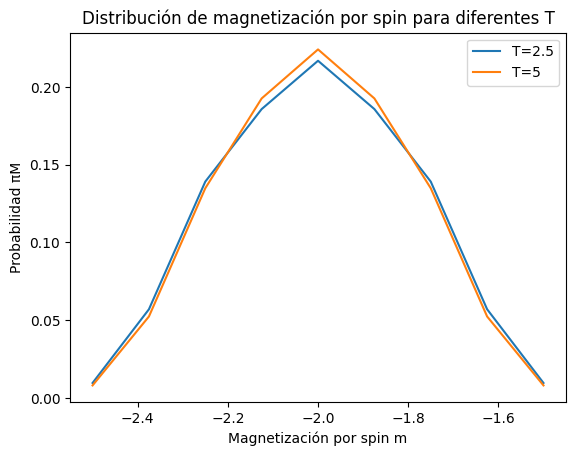

In [ ]:
# Función de partición y probabilidad de magnetización por spin
def calcular_probabilidad_M(contador, T):
    beta = 1 / T
    Z = sum(np.exp(-beta * E) * count for (E, M), count in contador.items())
    pi_M = {}
    for (E, M), count in contador.items():
        m = M / N
        if m not in pi_M:
            pi_M[m] = 0
        pi_M[m] += np.exp(-beta * E) * count / Z
    return pi_M


temperaturas = [2.5, 5]
for T in temperaturas:
    pi_M = calcular_probabilidad_M(contador, T)
    m_vals = sorted(pi_M.keys())
    pi_vals = [pi_M[m] for m in m_vals]

    plt.plot(m_vals, pi_vals, label=f'T={T}')

plt.xlabel('Magnetización por spin m')
plt.ylabel('Probabilidad πM')
plt.legend()
plt.title('Distribución de magnetización por spin para diferentes T')
plt.show()